In [2]:
import pandas as pd
import numpy as np
import math
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
N = 10000 
p1 = 0.25
p0 = 0.75
dataset=np.array([[]])

In [4]:
for i in range(0,N):
  y = np.random.binomial(1,p1,1)
  if y[0]==0:
    x = np.random.normal(-1,1,1)
  else:
    x = np.random.normal(1,1,1)
  if i==0:
    dataset=np.array([[x[0],y[0]]])
  else:
    dataset=np.append(dataset,np.array([[x[0],y[0]]]),axis=0)
dataset

array([[ 0.21654447,  0.        ],
       [-2.25439735,  0.        ],
       [ 0.09419892,  0.        ],
       ...,
       [ 2.29707691,  0.        ],
       [ 0.12116322,  1.        ],
       [-0.34128867,  0.        ]])

In [5]:
dataset.shape

(10000, 2)

In [6]:
df=pd.DataFrame(dataset)
df

,0,1
0,0.216544,0.0
1,-2.254397,0.0
2,0.094199,0.0
3,1.381329,0.0
4,-0.992960,0.0
...,...,...
9995,-0.471003,0.0
9996,0.381207,0.0
9997,2.297077,0.0
9998,0.121163,1.0


In [7]:
df.rename(columns={0:'X',1:'Y'},inplace=True)
df

,X,Y
0,0.216544,0.0
1,-2.254397,0.0
2,0.094199,0.0
3,1.381329,0.0
4,-0.992960,0.0
...,...,...
9995,-0.471003,0.0
9996,0.381207,0.0
9997,2.297077,0.0
9998,0.121163,1.0


In [8]:
Hb = np.zeros(N)




In [9]:
def f0(x, mu=-1, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma

def f1(x, mu=1, sigma=1):
    x = float(x - mu) / sigma
    return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma


In [10]:
for i in range(0,N):
  y=df.iloc[i][1]
  x=df.iloc[i][0]
  Q1=(p1*f1(x))/(p1*f1(x)+p0*f0(x))
  Q0=(p0*f0(x))/(p1*f1(x)+p0*f0(x))
  if Q1>=Q0:
    Hb[i] = 1
  else:
    Hb[i] = 0
  

In [11]:
df['Hb']=Hb
df

,X,Y,Hb
0,0.216544,0.0,0.0
1,-2.254397,0.0,0.0
2,0.094199,0.0,0.0
3,1.381329,0.0,1.0
4,-0.992960,0.0,0.0
...,...,...,...
9995,-0.471003,0.0,0.0
9996,0.381207,0.0,0.0
9997,2.297077,0.0,1.0
9998,0.121163,1.0,0.0


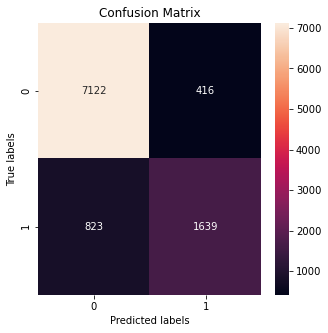

In [12]:
confusionMat=sklearn.metrics.confusion_matrix(df['Y'],df['Hb'])
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [13]:
cntOfWrongPred=0
for i in range(0,N):
  y=df.iloc[i][1]
  hb=df.iloc[i][2]
  if y!=hb:
    cntOfWrongPred+=1

Perr=cntOfWrongPred/N
Perr

0.1239

In [14]:
df2 = pd.DataFrame(dataset)
df2.rename(columns={0:'X',1:'Y'},inplace=True)
df2

,X,Y
0,0.216544,0.0
1,-2.254397,0.0
2,0.094199,0.0
3,1.381329,0.0
4,-0.992960,0.0
...,...,...
9995,-0.471003,0.0
9996,0.381207,0.0
9997,2.297077,0.0
9998,0.121163,1.0


In [15]:
z=np.zeros(N)
z0=p0
z1=p1
for i in range(0,N):
  zi = np.random.binomial(1,z1,1)
  z[i]=zi
z

array([0., 0., 1., ..., 0., 1., 0.])

In [16]:
df2['z']=z
df2

,X,Y,z
0,0.216544,0.0,0.0
1,-2.254397,0.0,0.0
2,0.094199,0.0,1.0
3,1.381329,0.0,0.0
4,-0.992960,0.0,0.0
...,...,...,...
9995,-0.471003,0.0,0.0
9996,0.381207,0.0,0.0
9997,2.297077,0.0,0.0
9998,0.121163,1.0,1.0


In [17]:
cntOfWrongPred=0
for i in range(0,N):
  y=df2.iloc[i][1]
  z=df2.iloc[i][2]
  if y!=z:
    cntOfWrongPred+=1

Perr=cntOfWrongPred/N
Perr

0.3714

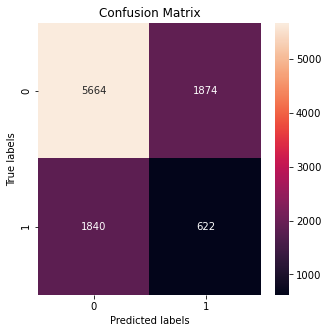

In [19]:
confusionMat=sklearn.metrics.confusion_matrix(df2['Y'],df2['z'])
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 